In [1]:
import numpy as np
import pandas as pd
import os
import glob
import stainNorm_Vahadane
from PIL import Image
from sklearn.utils import shuffle
import stain_utils as utils
from tqdm import tqdm
from joblib import Parallel, delayed

In [11]:
def standardize_brightness(I):
    """

    :param I:
    :return:
    """
    p = np.percentile(I, 90)
    return np.clip(I * 255.0 / p, 0, 255).astype(np.uint8)

### Test 

In [26]:
imgs = shuffle(glob.glob("data/orig_train/*.png"))

In [90]:
lot = []
for i in imgs[0:30]:
    lot.append(utils.read_image(i))

In [91]:
stack=utils.build_stack(lot)

In [179]:
n=stainNorm_Vahadane.Normalizer()
n.fit(np.array(Image.open(m)))

In [180]:
normalized=utils.build_stack((n.transform(lot[0]),n.transform(lot[1]),n.transform(lot[2]),n.transform(lot[3]),n.transform(lot[4]),n.transform(lot[5])))

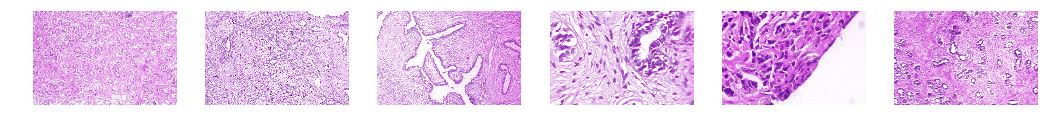

In [181]:
utils.patch_grid(normalized,width=6)

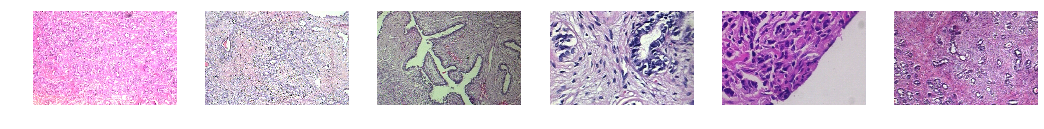

In [198]:
utils.patch_grid(stack[0:6],width=6)

### Normalisation dataset

In [7]:
imgs = glob.glob("data/original/train/*") + glob.glob("data/original/test/*")

In [8]:
n=stainNorm_Vahadane.Normalizer()
n.fit(np.array(Image.open('data/original/test/SOB_M_DC-14-4372-200-009.png')))

In [13]:
def processFile(i):
    image = standardize_brightness(np.array(Image.open(i)))
    norm_img = n.transform(image)
    Image.fromarray(norm_img).save(i.replace("original", "normalize"))

In [14]:
os.makedirs("data/normalize/train", exist_ok=True)
os.makedirs("data/normalize/test", exist_ok=True)

In [15]:
results = Parallel(n_jobs=25)(delayed(processFile)(x) for x in tqdm(imgs))

100%|██████████| 7909/7909 [17:41<00:00,  4.34it/s]


In [3]:
template = Image.open('data/original/all/SOB_M_DC-14-4372-200-009.png')

In [5]:
template.save("template_stainNorm_Vahadane.png")